In [1]:
# いつもの呪文
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
font = {"family": "TakaoGothic"}
matplotlib.rc('font', **font)
%matplotlib inline

# 実効的に無視して問題ないwarningを非表示に
import warnings
warnings.filterwarnings("ignore")

## First step with scikit-learn

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print("Class labels :{}".format(np.unique(y)))
print("Class labels :%s" % format(np.unique(y)))


Class labels :[0 1 2]
Class labels :[0 1 2]


split data into 70% training and 30% teset data

In [4]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

print("sklearn_version: {}".format(sklearn_version))
print("sklearn_version: %s" % sklearn_version)


if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sklearn_version: 0.19.1
sklearn_version: 0.19.1


standardizing the features

Why standardizing?

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training a perceptron via scikit-learn

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

/home/yoshito/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
y_test.shape

(45,)

In [8]:
y_pred = ppn.predict(X_test_std)
print("Missclassified samples: {}".format((y_test != y_pred).sum()))
# print("Missclassified samples: %d" % (y_test != y_pred).sum())

Missclassified samples: 4


In [9]:
from sklearn.metrics import accuracy_score

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9111111111111111


In [10]:
from matplotlib.colors import ListedColormap
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    print("x1_min :{0}\tx1_max :{1}".format(x1_min, x1_max))
    
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    print("x2_min :{0}\tx2_max :{1}".format(x2_min, x2_max))
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print("xx1 :{0}\txx2 :{1}".format(xx1, xx2))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)
    
    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple("1.9.0"):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn("Please update to Numpy 1.9.0 or newer")
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths='1',
                    marker='o',
                    s=55,
                    label='test set')
        

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc="upper left")
plt.tight_layout()

x1_min :-2.574964205765708	x1_max :2.7101884052506424
x2_min :-2.4487217993375943	x2_max :2.63731280280166
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fde7bfb0950> (for post_execute):


TypeError: Cannot cast array data from dtype('<U1') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('<U1') to dtype('float64') according to the rule 'safe'

<Figure size 432x288 with 1 Axes>

## Modeling class probabilities via Logistic Regression

In [12]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

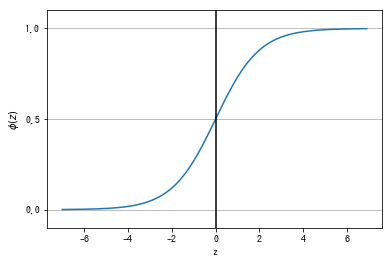

In [13]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z)$")

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

## Leaning the weights of he logistic cost function

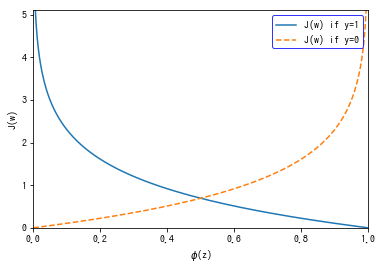

In [14]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label="J(w) if y=1")

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle="--", label="J(w) if y=0")

plt.ylim(0.0, 5.1)
plt.xlim(0, 1)
plt.xlabel("$\phi$(z)")
plt.ylabel("J(w)")
plt.legend(loc="best", frameon=True, edgecolor="blue")

## Training a logistic regressin model with scikit-learn

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(105, 150))

plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left", frameon=True)

x1_min :-2.574964205765708	x1_max :2.7101884052506424
x2_min :-2.4487217993375943	x2_max :2.63731280280166


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fde7bfb0950> (for post_execute):


TypeError: Cannot cast array data from dtype('<U1') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('<U1') to dtype('float64') according to the rule 'safe'

<Figure size 432x288 with 1 Axes>

In [17]:
if Version(sklearn_version) < '0.17':
    lr.predict_proba(X_test_std[0, :])
else:
    lr.predict_proba(X_test_std[0, :].reshape(1, -1))

## Tacking overfitting via regularization